In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [177]:
df = pd.read_csv('Exasens.csv')
df = df.drop(index=[0, 1])

feature_cols = ['Imaginary Part (Min)', 'Imaginary Part (Avg)', 'Real Part (Min)', 'Real Part (Avg)', 'Gender', 'Age', 'Smoking']
target_cols = ['Diagnosis']

df = df.loc[:, feature_cols + target_cols]

original_rows = len(df)
df.dropna(inplace=True)
deleted_rows = original_rows - len(df)
print(f"{deleted_rows}/{len(df)}/{original_rows}")

dfX = df.loc[:, feature_cols]
dfy = df.loc[:, target_cols]
X = dfX.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = dfy.to_numpy().flatten()

299/100/399


In [178]:
dfX.head()

,Imaginary Part (Min),Imaginary Part (Avg),Real Part (Min),Real Part (Avg),Gender,Age,Smoking
2,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
4,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
5,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0
6,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0


In [179]:
dfy.head()

,Diagnosis
2,COPD
3,COPD
4,COPD
5,COPD
6,COPD


In [180]:
print(dfy['Diagnosis'].unique())

['COPD' 'HC' 'Asthma' 'Infected']


In [181]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
loss_variance = 1 - explained_variance_ratio.sum()
print(loss_variance)

0.3835504116990006


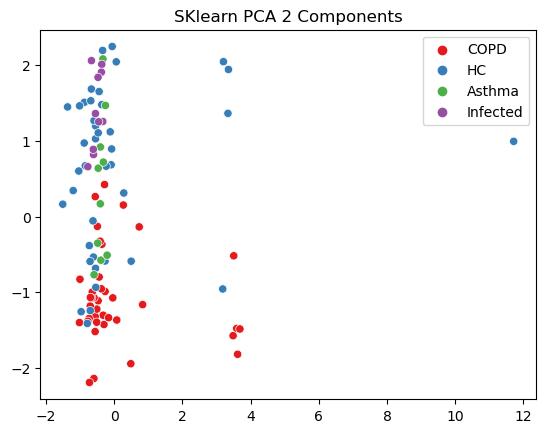

In [182]:
colors = cm.Set1.colors
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=colors)
plt.title("SKlearn PCA 2 Components")
plt.show()

In [183]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
loss_variance = 1 - explained_variance_ratio.sum()
print(loss_variance)

0.21124349539680798


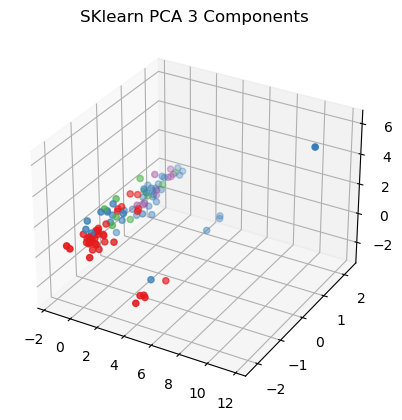

In [184]:
cmap = cm.Set1
unique_classes = dfy['Diagnosis'].unique()
class_to_color = {cls: i for i, cls in enumerate(unique_classes)}
y_colors = [cmap(class_to_color[label]) for label in y]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_colors)
ax.set_title('SKlearn PCA 3 Components')
plt.show()

In [185]:
def pca(X: np.array, compr_size: int):
    math_expectation = np.mean(X, axis=0)
    X_centered = X - math_expectation
    cov_matrix = np.cov(X_centered.T)
    eig_val, eig_vect = np.linalg.eig(cov_matrix)
    sort = np.argsort(-eig_val)
    eig_val_sorted = eig_val[sort]
    eig_vect_sorted = eig_vect[:, sort]
    full_variance = np.sum(eig_val_sorted)
    compressed_variance = np.sum(eig_val_sorted[:compr_size])

    loss = 1 - compressed_variance / full_variance
    X_pca = np.dot(X_centered, eig_vect_sorted[:, :compr_size])

    return X_pca, loss

In [186]:
X_pca, los = pca(X, 2)
print(los)

0.3835504116990007


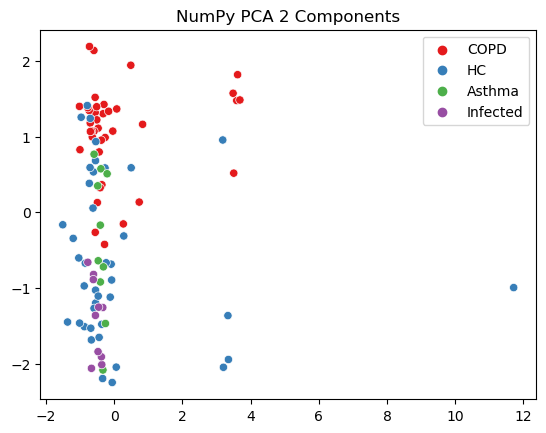

In [187]:
colors = cm.Set1.colors
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette=colors)
plt.title("NumPy PCA 2 Components")
plt.show()

In [188]:
X_pca, los = pca(X, 3)
print(los)

0.21124349539680798


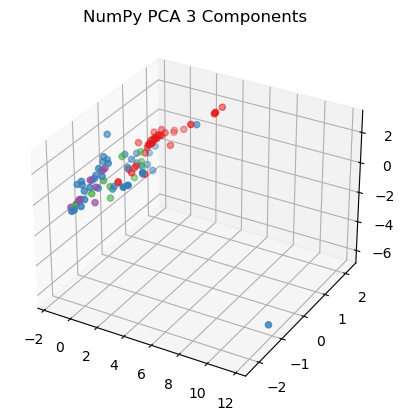

In [189]:
cmap = cm.Set1
unique_classes = dfy['Diagnosis'].unique()
class_to_color = {cls: i for i, cls in enumerate(unique_classes)}
y_colors = [cmap(class_to_color[label]) for label in y]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_colors)
ax.set_title('NumPy PCA 3 Components')
plt.show()